In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [2]:
%matplotlib inline
random.seed(69)

In [3]:
dataset_path = 'YaleDataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [4]:
# training_im, testing_im, training_label, testing_label = [], [], [], []
# types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
# for i in range(1,16):
#     im = {}
#     testing_type = random.choice(types)
#     for t in types:
#         im[t] = np.array(Image.open(path_to_folder+"YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
#         im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         if t == testing_type:
#             testing_im.append(im[t])
#             testing_label.append(i)
#         else:
#             training_im.append(im[t])
#             training_label.append(i)

In [5]:
def load_images():
    im_size=(64,64)
    training_im, testing_im, training_label, testing_label = [], [], [], []
    types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
    for i in range(1,16):
        im = {}
        testing_type = random.choice(types)
        for t in types:
            im[t] = np.array(Image.open("YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
            im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
            if t == testing_type:
                testing_im.append(im[t])
                testing_label.append(i)
            else:
                training_im.append(im[t])
                training_label.append(i)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

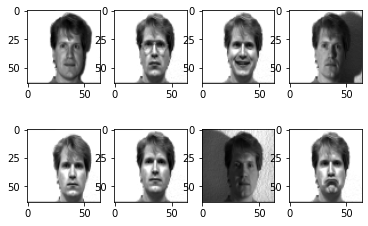

In [6]:
training_tensor = np.ndarray(shape=(len(training_im), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

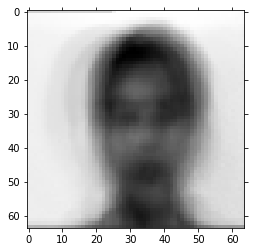

In [7]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_im))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [8]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_im), height*width))

for i in range(len(training_im)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

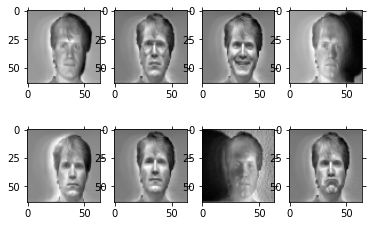

In [9]:
plt.clf()
for i in range(len(training_im)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [10]:
len(training_im)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [11]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_im))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(150, 150)
Covariance matrix of X: 
[[16.12023082  5.41183367  5.52208241 ...  1.15255759 -2.92267252
   1.7859291 ]
 [ 5.41183367  9.00917983  8.12789555 ...  0.96719058 -0.12236456
   0.77582652]
 [ 5.52208241  8.12789555  9.62698809 ...  0.50402119  0.65286025
   0.49382025]
 ...
 [ 1.15255759  0.96719058  0.50402119 ... 12.93644339  2.40391527
  10.41794856]
 [-2.92267252 -0.12236456  0.65286025 ...  2.40391527 22.18491622
  -0.19906696]
 [ 1.7859291   0.77582652  0.49382025 ... 10.41794856 -0.19906696
  12.09247254]]


In [12]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.05893495+0.j         -0.01739121+0.j          0.04120198+0.j
  ... -0.00294951+0.j          0.00720457+0.00203669j
   0.00720457-0.00203669j]
 [-0.02276833+0.j          0.00315032+0.j          0.04594449+0.j
  ... -0.00294951+0.j          0.00720457+0.00203669j
   0.00720457-0.00203669j]
 [-0.02085727+0.j          0.00961285+0.j          0.04224437+0.j
  ... -0.00294951+0.j          0.00720457+0.00203669j
   0.00720457-0.00203669j]
 ...
 [-0.00678438+0.j          0.08992679+0.j          0.00702993+0.j
  ... -0.00294951+0.j          0.00720457+0.00203669j
   0.00720457-0.00203669j]
 [ 0.03036199+0.j          0.09255021+0.j         -0.03712275+0.j
  ... -0.00294951+0.j          0.00720457+0.00203669j
   0.00720457-0.00203669j]
 [-0.01636743+0.j          0.07341265+0.j          0.0302547 +0.j
  ... -0.00294951+0.j          0.00720457+0.00203669j
   0.00720457-0.00203669j]]

Eigenvalues of Cov(X): 
[ 1.35595275e+03+0.00000000e+00j  4.79854131e+02+0.00000000e+0

In [13]:
eigenvectors.shape

(150, 150)

In [14]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sort = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])

[1355.95274866+0.00000000e+00j 1835.80687927+0.00000000e+00j
 2167.28748219+0.00000000e+00j 2373.76407828+0.00000000e+00j
 2557.36024367+0.00000000e+00j 2686.40963902+0.00000000e+00j
 2794.58175441+0.00000000e+00j 2888.47571579+0.00000000e+00j
 2970.71627304+0.00000000e+00j 3026.90660323+0.00000000e+00j
 3080.06840687+0.00000000e+00j 3125.17648922+0.00000000e+00j
 3163.81037274+0.00000000e+00j 3198.98967489+0.00000000e+00j
 3233.89061098+0.00000000e+00j 3263.59625767+0.00000000e+00j
 3290.87057279+0.00000000e+00j 3316.93445929+0.00000000e+00j
 3341.19902862+0.00000000e+00j 3362.31793209+0.00000000e+00j
 3380.47631225+0.00000000e+00j 3397.75961747+0.00000000e+00j
 3414.59723437+0.00000000e+00j 3429.04492605+0.00000000e+00j
 3442.78166178+0.00000000e+00j 3456.10594014+0.00000000e+00j
 3468.84338884+0.00000000e+00j 3480.83004043+0.00000000e+00j
 3492.26543897+0.00000000e+00j 3503.36918519+0.00000000e+00j
 3514.09046963+0.00000000e+00j 3523.64811243+0.00000000e+00j
 3532.6540436 +0.0000000

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


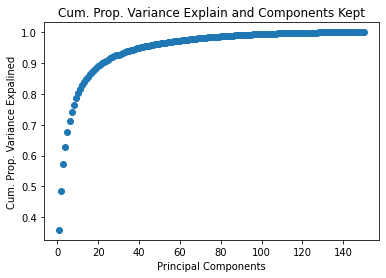

In [15]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
print(np.cumsum(eigvalues_sort))

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [16]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()

In [17]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

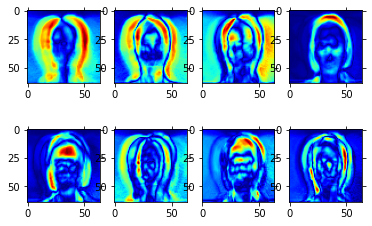

In [18]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    if i < 8:
        plt.subplot(2,4,1+i)
        plt.imshow(np.abs(img), cmap='jet')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [19]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

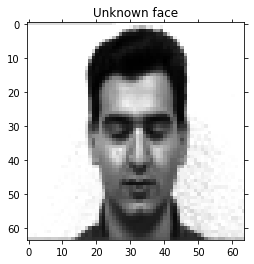

In [20]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

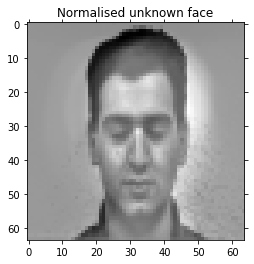

In [21]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [22]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-3.34131617e+06+0.j,  1.28014110e+08+0.j,  4.81029883e+06+0.j,
       -1.90522006e+07+0.j,  3.37236708e+07+0.j,  8.99693314e+07+0.j,
       -5.70215000e+07+0.j, -1.56977865e+06+0.j])

In [23]:
diff = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)

[1.79009421e+08 1.58216412e+08 1.57414520e+08 2.45305915e+08
 1.81660014e+08 1.60248948e+08 2.51472953e+08 1.58982173e+08
 1.62725492e+08 1.66607435e+08 1.79768936e+08 2.01890766e+08
 2.49129095e+08 1.97068125e+08 1.97068125e+08 2.03235890e+08
 1.96543623e+08 1.96340073e+08 1.91948886e+08 1.89263650e+08
 1.57395099e+08 1.49097406e+08 2.45327011e+08 1.47871881e+08
 1.47871881e+08 2.49303500e+08 1.47211776e+08 1.48299435e+08
 1.52218085e+08 1.49016462e+08 1.68068090e+08 1.79565213e+08
 2.31586203e+08 1.70580696e+08 1.81927692e+08 2.40427096e+08
 1.81927692e+08 1.79441773e+08 1.75668040e+08 1.73863466e+08
 1.74410404e+08 1.66343401e+08 2.40275696e+08 1.69133457e+08
 1.65379671e+08 2.50076865e+08 1.64159770e+08 1.64255439e+08
 1.70175151e+08 1.66810011e+08 2.11325682e+08 2.74280305e+08
 2.61986809e+08 2.33803387e+08 2.60018670e+08 2.60018670e+08
 2.54842613e+08 2.67312500e+08 2.66779547e+08 2.70867930e+08
 1.43375563e+08 1.46627657e+08 1.42461701e+08 2.27809889e+08
 1.46577534e+08 2.206025

In [24]:
w.shape

(150, 8)

In [25]:
correct_pred = 0
def recogniser(curr_testing_im, curr_testing_label, proj_data, w):
    global count, num_images, correct_pred
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    t0 = 88831687
    
    if norms[index] < t1 or True:
#         print

        if norms[index] < t0 or True: # It's a face
            print("=====================")
            print(curr_testing_label)
            print(training_label[index])
            print("=====================")
            if curr_testing_label == training_label[index]:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
#             else:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
#         else:
#             if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
#                 plt.title('Unknown face!', color='g')
#                 correct_pred += 1
#             else:
#                 plt.title('Unknown face!', color='r')
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
#         plt.subplots_adjust(right=1.2, top=2.5)
    
#     else:     
# #         plt.subplot(9,4,1+count)
# #         if len(img.split('.')) == 3:
#             pass
# #             plt.title('Not a face!', color='r')
#         else:
# #             plt.title('Not a face!', color='g')
#             correct_pred += 1
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    

# fig = plt.figure(figsize=(15, 15))
for idx, curr_testing_im in enumerate(testing_im):
    recogniser(curr_testing_im, testing_label[idx], proj_data, w)

# plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))

1
1
2
4
3
15
4
4
5
5
6
6
7
7
8
8
9
9
10
1
11
11
12
1
13
13
14
14
15
15
Correct predictions: 11/15 = 73.33333333333333%


In [26]:
print(len(training_im))

150
